In [3]:
pip install opencv-python

pip install PyWavelets



ModuleNotFoundError: No module named 'cv2'

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

img = cv2.imread("images dataset/maria sharpova clear face photo - Google Search/imgi_121_fcb746ea61773bc0e764eb45203d6187.jpg")
img.shape

(536, 377, 3)

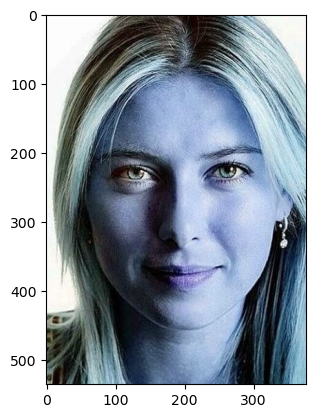

In [11]:
plt.imshow(img)

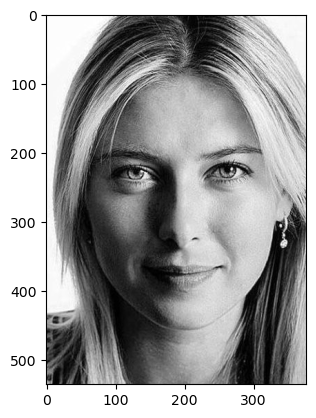

In [19]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [23]:
face_cascade = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[ 26, 108, 331, 331]])

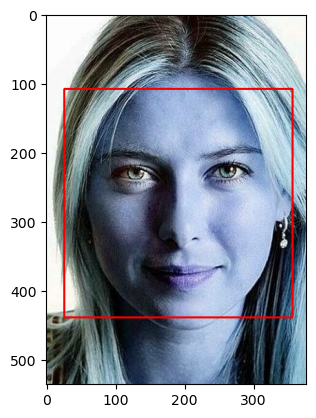

In [25]:
(x,y,w,h) = faces[0]
face_img = cv2.rectangle(img,(x,y),(x + w , y+ h ),(245,0,0),2)
plt.imshow(face_img)

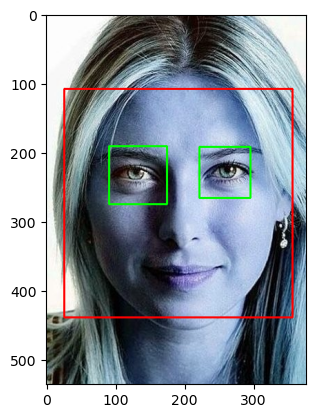

In [35]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img [y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

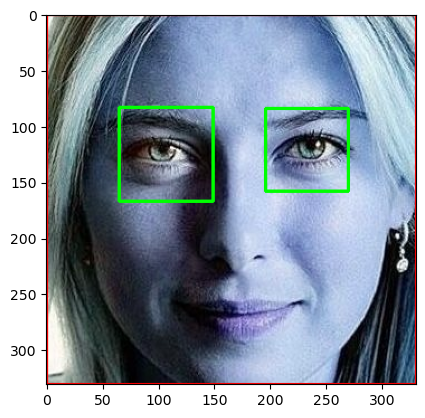

In [37]:
plt.imshow(roi_color , cmap = 'gray')

In [145]:
def gcii2e(image_path):
    cv2.destroyAllWindows()

    
    
    
    img= cv2.imread(image_path)
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

    
    

In [135]:
imgo = cv2.imread('images dataset/Lionel Messi clear face photo - Google Search/imgi_127_lionel-messi-png-t4vkls6byyyh0qim.jpg')

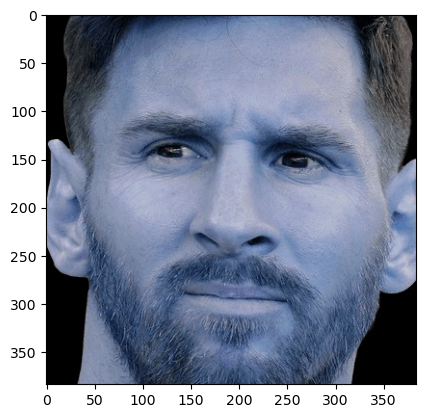

In [147]:
crop_img = gcii2e("images dataset/Lionel Messi clear face photo - Google Search/imgi_127_lionel-messi-png-t4vkls6byyyh0qim.jpg")
plt.imshow(crop_img)


In [318]:
path_to_data = './images dataset/'
path_to_cr_data = "./images dataset/cropped/"

In [320]:
import os
img_dir=[]
for i in os.scandir(path_to_data):
    if i.is_dir():
        img_dir.append(i.path)

In [322]:
img_dir = img_dir[1:]


In [324]:
img_dir 

['./images dataset/cropped',
 './images dataset/Lionel Messi clear face photo - Google Search',
 './images dataset/maria sharpova clear face photo - Google Search',
 './images dataset/Mike tyson clear face photo - Google Search',
 './images dataset/Ronaldo clear face photo - Google Search',
 './images dataset/virat kohli clear face photo - Google Search']

In [326]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [328]:
img_dir 

['./images dataset/cropped',
 './images dataset/Lionel Messi clear face photo - Google Search',
 './images dataset/maria sharpova clear face photo - Google Search',
 './images dataset/Mike tyson clear face photo - Google Search',
 './images dataset/Ronaldo clear face photo - Google Search',
 './images dataset/virat kohli clear face photo - Google Search']

In [330]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir1 in img_dir:
    
    
    count = 1
    name = img_dir1.split('/')[-1]
    print(name)
    print(img_dir1)
    print()
    checko = []
    for entry in os.scandir(img_dir1):
        
        
        if ".ipynb_checkpoints" in str(entry.path):
            continue

        print(entry)
            
        roi_color = gcii2e(entry)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder:",cropped_folder)

        cropped_file_name = name + str(count)  + ".png"
        cropped_file_path = cropped_folder + "/" + cropped_file_name
        if roi_color is not None:
            cv2.imwrite(cropped_file_path,roi_color)
        checko.append((cropped_file_path))
        count+=1
    celebrity_file_names_dict[name] = checko
        

cropped
./images dataset/cropped

Lionel Messi clear face photo - Google Search
./images dataset/Lionel Messi clear face photo - Google Search

<DirEntry 'imgi_11_default.jpg'>
Generating cropped images in folder: ./images dataset/cropped/Lionel Messi clear face photo - Google Search
<DirEntry 'imgi_127_lionel-messi-png-t4vkls6byyyh0qim.jpg'>
<DirEntry 'imgi_128_8131ab3881a62145cc687a2834566d56.jpg'>
<DirEntry 'imgi_130_lionel-messi-smile (1).jpg'>
<DirEntry 'imgi_130_lionel-messi-smile.jpg'>
<DirEntry 'imgi_131_messi-face-11562887620d5uxostl3y.png'>
<DirEntry 'imgi_133_messi-fifa-17-11550717274zfcvhpnydw.png'>
<DirEntry 'imgi_134_f3517d30c8ea669b2ac156bde161ceaa.jpg'>
<DirEntry 'imgi_135_Lionel_Messi.2.png'>
<DirEntry 'imgi_136_30spoleo.jpg'>
<DirEntry 'imgi_137_skysports-lionel-messi-psg_6106001.jpg'>
<DirEntry 'imgi_13_default.jpg'>
<DirEntry 'imgi_142_f303ab3fe867bdf7dda952a58505fec0.jpg'>
<DirEntry 'imgi_143_lionel-messi-celebrates-after-their-sides-third-goal-by-news-photo-168617

In [342]:
cropped_image_dirs

['./images dataset/cropped/Lionel Messi clear face photo - Google Search',
 './images dataset/cropped/maria sharpova clear face photo - Google Search',
 './images dataset/cropped/Mike tyson clear face photo - Google Search',
 './images dataset/cropped/Ronaldo clear face photo - Google Search',
 './images dataset/cropped/virat kohli clear face photo - Google Search']

In [360]:
celebrity_file_names_dict = {}



for i in cropped_image_dirs:
    name = i.split("/")[-1]
    print(name)
    checko2 = []
    
    for j in os.scandir(i):
        checko2.append(j.path)
    celebrity_file_names_dict[name] = checko2

Lionel Messi clear face photo - Google Search
maria sharpova clear face photo - Google Search
Mike tyson clear face photo - Google Search
Ronaldo clear face photo - Google Search
virat kohli clear face photo - Google Search


In [362]:
celebrity_file_names_dict

{'Lionel Messi clear face photo - Google Search': ['./images dataset/cropped/Lionel Messi clear face photo - Google Search\\Lionel Messi clear face photo - Google Search1.png',
  './images dataset/cropped/Lionel Messi clear face photo - Google Search\\Lionel Messi clear face photo - Google Search10.png',
  './images dataset/cropped/Lionel Messi clear face photo - Google Search\\Lionel Messi clear face photo - Google Search12.png',
  './images dataset/cropped/Lionel Messi clear face photo - Google Search\\Lionel Messi clear face photo - Google Search13.png',
  './images dataset/cropped/Lionel Messi clear face photo - Google Search\\Lionel Messi clear face photo - Google Search14.png',
  './images dataset/cropped/Lionel Messi clear face photo - Google Search\\Lionel Messi clear face photo - Google Search15.png',
  './images dataset/cropped/Lionel Messi clear face photo - Google Search\\Lionel Messi clear face photo - Google Search16.png',
  './images dataset/cropped/Lionel Messi clear fa

In [378]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img

    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )

    imArray =  np.float32(imArray)   
    imArray /= 255;

    coeffs=pywt.wavedec2(imArray, mode, level=level)

    
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  


    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H
    
    

In [380]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Lionel Messi clear face photo - Google Search': 0,
 'maria sharpova clear face photo - Google Search': 1,
 'Mike tyson clear face photo - Google Search': 2,
 'Ronaldo clear face photo - Google Search': 3,
 'virat kohli clear face photo - Google Search': 4}

In [382]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        print(combined_img)
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

[[255]
 [255]
 [255]
 ...
 [ 33]
 [ 34]
 [ 34]]
[[ 79]
 [ 57]
 [ 26]
 ...
 [  3]
 [126]
 [191]]
[[ 45]
 [ 85]
 [125]
 ...
 [  7]
 [  2]
 [253]]
[[253]
 [253]
 [253]
 ...
 [ 88]
 [  0]
 [  0]]
[[ 76]
 [ 75]
 [101]
 ...
 [  2]
 [  5]
 [  2]]
[[41]
 [44]
 [55]
 ...
 [ 0]
 [ 0]
 [ 0]]
[[41]
 [44]
 [55]
 ...
 [ 0]
 [ 0]
 [ 0]]
[[  9]
 [ 16]
 [ 31]
 ...
 [239]
 [238]
 [253]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
[[41]
 [47]
 [52]
 ...
 [ 0]
 [ 0]
 [ 0]]
[[255]
 [255]
 [255]
 ...
 [ 16]
 [111]
 [250]]
[[ 20]
 [ 28]
 [ 22]
 ...
 [224]
 [244]
 [246]]
[[ 80]
 [ 86]
 [109]
 ...
 [111]
 [ 23]
 [ 34]]
[[254]
 [254]
 [254]
 ...
 [248]
 [  8]
 [  8]]
[[254]
 [254]
 [254]
 ...
 [248]
 [  8]
 [  8]]
[[ 73]
 [ 79]
 [ 82]
 ...
 [ 12]
 [226]
 [189]]
[[ 27]
 [ 75]
 [117]
 ...
 [252]
 [  5]
 [  0]]
[[ 58]
 [ 94]
 [  0]
 ...
 [236]
 [236]
 [236]]
[[255]
 [255]
 [255]
 ...
 [  0]
 [  0]
 [  0]]
[[ 30]
 [ 37]
 [ 51]
 ...
 [107]
 [ 32]
 [243]]
[[ 57]
 [ 25]
 [  3]
 ...
 [238]
 [236]
 [ 62]]
[[254]
 [255]
 [254]
 

In [372]:
celebrity_file_names_dict


{'Lionel Messi clear face photo - Google Search': ['./images dataset/cropped/Lionel Messi clear face photo - Google Search\\Lionel Messi clear face photo - Google Search1.png',
  './images dataset/cropped/Lionel Messi clear face photo - Google Search\\Lionel Messi clear face photo - Google Search10.png',
  './images dataset/cropped/Lionel Messi clear face photo - Google Search\\Lionel Messi clear face photo - Google Search12.png',
  './images dataset/cropped/Lionel Messi clear face photo - Google Search\\Lionel Messi clear face photo - Google Search13.png',
  './images dataset/cropped/Lionel Messi clear face photo - Google Search\\Lionel Messi clear face photo - Google Search14.png',
  './images dataset/cropped/Lionel Messi clear face photo - Google Search\\Lionel Messi clear face photo - Google Search15.png',
  './images dataset/cropped/Lionel Messi clear face photo - Google Search\\Lionel Messi clear face photo - Google Search16.png',
  './images dataset/cropped/Lionel Messi clear fa

In [264]:
celebrity_file_names_dict.items()

dict_items([('Lionel Messi clear face photo - Google Search', './images dataset/cropped/Lionel Messi clear face photo - Google Search/Lionel Messi clear face photo - Google Search88.png'), ('maria sharpova clear face photo - Google Search', './images dataset/cropped/maria sharpova clear face photo - Google Search/maria sharpova clear face photo - Google Search91.png'), ('Mike tyson clear face photo - Google Search', './images dataset/cropped/Mike tyson clear face photo - Google Search/Mike tyson clear face photo - Google Search93.png'), ('Ronaldo clear face photo - Google Search', './images dataset/cropped/Ronaldo clear face photo - Google Search/Ronaldo clear face photo - Google Search95.png'), ('virat kohli clear face photo - Google Search', './images dataset/cropped/virat kohli clear face photo - Google Search/virat kohli clear face photo - Google Search96.png')])

In [388]:
len(X[0])

4096

In [392]:
X = np.array(X).reshape(len(X),4096).astype(float)
X

array([[255., 255., 255., ...,  33.,  34.,  34.],
       [ 79.,  57.,  26., ...,   3., 126., 191.],
       [ 45.,  85., 125., ...,   7.,   2., 253.],
       ...,
       [ 12.,  14.,  20., ..., 158., 223., 253.],
       [254., 254., 254., ...,   0.,   0.,   0.],
       [  9.,  11.,  19., ...,  33.,   1.,   2.]])

In [400]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [412]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel = 'rbf' , C = 10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

pred = pipe.predict(X_test)

In [414]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.89      1.00      0.94        16
           2       0.82      0.90      0.86        10
           3       1.00      0.83      0.91        18
           4       0.89      0.89      0.89         9

    accuracy                           0.89        63
   macro avg       0.88      0.88      0.88        63
weighted avg       0.90      0.89      0.89        63



In [430]:

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}



In [443]:
scores = []
best_estimators = {}
import pandas as pd
for i,j in model_params.items():
    pipe = make_pipeline(StandardScaler(),j['model'])
    clf = GridSearchCV(pipe,j['params'],cv=5 , return_train_score = False)
    clf.fit(X_train,y_train)
    scores.append({
    'model':i,'best_score':clf.best_score_,'best_params':clf.best_params_})
    best_estimators[i] = clf.best_estimator_


df =  pd.DataFrame(scores,columns = ['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.819488,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.712802,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.877667,{'logisticregression__C': 1}


In [453]:
pred = best_estimators['logistic_regression'].predict(X_test)

In [467]:
best_model = best_estimators['logistic_regression']

In [455]:
from sklearn.metrics import confusion_matrix

co = confusion_matrix(y_test,pred)

Text(50.722222222222214, 0.5, 'Truth')

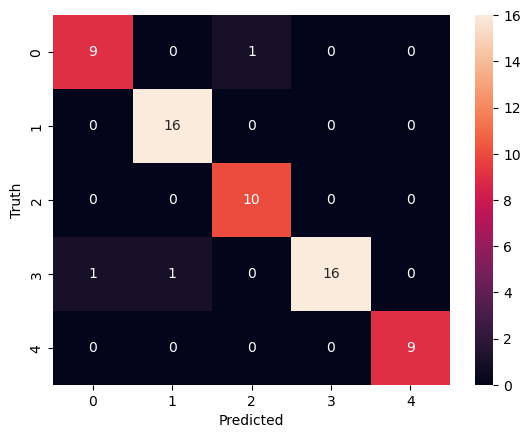

In [461]:
import seaborn as sns

sns.heatmap(co,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [463]:
class_dict

{'Lionel Messi clear face photo - Google Search': 0,
 'maria sharpova clear face photo - Google Search': 1,
 'Mike tyson clear face photo - Google Search': 2,
 'Ronaldo clear face photo - Google Search': 3,
 'virat kohli clear face photo - Google Search': 4}

In [469]:
import joblib

joblib.dump(best_estimators['logistic_regression'],'saved_model.pkl')

['saved_model.pkl']

In [473]:
import json

with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))